In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# import 
from sklearn.linear_model import LinearRegression


# object
model = LinearRegression()

In [3]:
X_train=pd.read_csv("Train.csv")

In [4]:
X_test=pd.read_csv("Test.csv").values

In [5]:
X_test

array([[ 1.01525387e+00,  2.07620944e+00, -2.66434820e-01,
        -2.41808820e+00, -9.80502790e-01],
       [-3.75021204e-01,  9.53184528e-01,  6.26719138e-01,
         7.04405750e-01, -3.55489211e-01],
       [-1.02445225e+00,  9.62991107e-01, -4.07942004e-01,
        -1.86127383e+00,  4.55201351e-01],
       ...,
       [ 5.54727647e-01,  1.76824345e+00, -8.97787210e-01,
        -1.19366107e+00,  3.40563374e-01],
       [-1.62717246e+00,  8.56470994e-01, -5.65729519e-04,
         6.29386649e-01,  4.53382144e-01],
       [ 1.39310499e-01,  5.31597186e-01, -8.53107053e-01,
         3.16920076e-02,  1.71489304e+00]])

In [6]:
X_train

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722
...,...,...,...,...,...,...
1595,-0.274961,-0.820634,-0.757173,-0.147555,-0.307149,-80.110012
1596,-0.076099,0.255257,0.290054,1.796036,0.340350,118.315601
1597,1.044177,-0.899206,1.730399,-1.871057,0.442520,-107.510508
1598,-1.269173,-0.005052,1.857669,-1.080365,0.736334,-47.341558


In [7]:
X=X_train.iloc[:,:5].values

In [8]:
X

array([[ 0.29341624, -0.94559871, -0.42110515,  0.40681602,  0.52566183],
       [-0.83608408, -0.18922804, -0.77640262, -1.05383124,  0.59799685],
       [ 0.23642511,  0.13283602, -0.14772298,  0.69985396, -0.18736416],
       ...,
       [ 1.04417694, -0.89920649,  1.73039905, -1.87105676,  0.44251965],
       [-1.2691729 , -0.00505216,  1.85766873, -1.08036482,  0.73633394],
       [-1.88400025, -0.84942743, -1.45227035,  0.48861308,  1.4595758 ]])

In [9]:
y=X_train["target"].values
y

array([ -82.15466656,  -48.89796018,   77.2703707 , ..., -107.51050797,
        -47.34155781, -115.93900296])

In [30]:
# training - > fit

model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
model.score(X,y)

0.9660939669975616

In [19]:
def hypothesis(X, theta):
    """
    X - np array (m,n+1)
    theta - np arrary (n+1, 1)
    """
    return np.dot(X,theta)

def error(X, y, theta):
    """
    params:
        X - np array (m,n+1)
        y - np array (m, 1)
        theta - np arrary (n+1, 1)
    
    return :
        scalar value = loss value
    """

    
    y_hat = hypothesis(X, theta) # (m,1)
    err = np.mean( (y_hat - y )**2 )
    
    return err
def gradient(X, y, theta):
    """
    X - np array (m,n+1)
    y - np array (m, 1)
    theta - np arrary (n+1, 1)
    """
    

    
    y_hat = hypothesis(X, theta)
    grad = np.dot( X.T , (y_hat - y) )
   
    return grad/X.shape[0]
def gradient_descent(X, y, lr =0.1, max_itr = 100):
    theta = np.zeros((X.shape[1],1))
    
    error_list = []
    
    for i in range(max_itr):
        
        err = error(X, y, theta)
        error_list.append(err)
        
        grad = gradient(X, y, theta)
        
        # Updation Rule
        theta = theta - lr*grad
        
    return (theta, error_list)


In [20]:
opt_theta, error_list = gradient_descent(X, y)

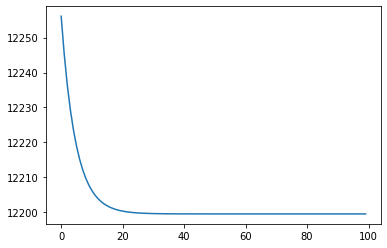

In [21]:
plt.plot(error_list)


In [33]:
y_pred = hypothesis(X_test, opt_theta)


In [37]:
X

(1600, 5)

In [34]:
y_pred

array([[-3.62862715, -2.15973691,  3.41289639, ..., -4.74855008,
        -2.09099336, -5.12082188],
       [ 7.23748638,  4.30770808, -6.80720011, ...,  9.47123115,
         4.17059546, 10.2137467 ],
       [-5.62434647, -3.34757697,  5.28996532, ..., -7.3602191 ,
        -3.24102495, -7.93723777],
       ...,
       [-3.46326925, -2.06131689,  3.25736942, ..., -4.53215687,
        -1.99570601, -4.88746411],
       [ 4.08277296,  2.43004175, -3.84004212, ...,  5.34286138,
         2.3526945 ,  5.76172537],
       [-3.07181459, -1.82832545,  2.8891877 , ..., -4.01988543,
        -1.77013059, -4.33503216]])

In [35]:
df = pd.DataFrame(data=y_pred, columns=['target'])

ValueError: Shape of passed values is (400, 1600), indices imply (400, 1)